### Pandas의 시각화 응용 1

In [56]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#### 데이터 프레임을 읽어 옵니다:

In [58]:
df = pd.read_csv('./data/data_population.csv', header='infer',encoding = 'euc-kr', na_values=[' '])  # encoding = 'euc-kr'

In [59]:
df.shape

(281, 9)

#### 불필요한 컬럼과 결측치를 제거 합니다:

In [60]:
df.drop(columns=['Unnamed: 0'] ,inplace=True)
df.dropna(axis=0, inplace=True)

#### 데이터 프레임의 구조를 한눈에 살펴 봅니다:

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 280
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Province     263 non-null    object 
 1   City         263 non-null    object 
 2   Population   263 non-null    int64  
 3   Households   263 non-null    int64  
 4   PersInHou    263 non-null    float64
 5   Male         263 non-null    int64  
 6   Female       263 non-null    int64  
 7   GenderRatio  263 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 18.5+ KB


#### 데이터 프레임의 상단과 하단:

In [62]:
df.head(10)

,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
1,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
2,서울특별시,중구,126817,59614,2.13,63292,63525,1.00
3,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
4,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
5,서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
6,서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01
7,서울특별시,중랑구,417976,177077,2.36,208657,209319,1.00
8,서울특별시,성북구,464176,192670,2.41,227676,236500,0.96
9,서울특별시,강북구,333523,141325,2.36,164304,169219,0.97
10,서울특별시,도봉구,353284,137260,2.57,174075,179209,0.97


In [63]:
df.tail(10)

,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
270,경상남도,창녕군,63534,30093,2.11,31372,32162,0.98
271,경상남도,고성군,55563,25870,2.15,27848,27715,1.00
272,경상남도,남해군,46238,22259,2.08,22105,24133,0.92
273,경상남도,하동군,50068,23392,2.14,24713,25355,0.97
274,경상남도,산청군,36122,17985,2.01,17630,18492,0.95
275,경상남도,함양군,40314,19229,2.10,19259,21055,0.91
276,경상남도,거창군,63069,27724,2.27,30582,32487,0.94
277,경상남도,합천군,48856,24193,2.02,23231,25625,0.91
279,제주특별자치도,제주시,454673,182709,2.49,227549,227124,1.00
280,제주특별자치도,서귀포시,160577,68769,2.34,81078,79499,1.02


#### 데이터 프레임의 컬럼 이름을 header에 저장합니다:

In [64]:
header = df.columns
header

Index(['Province', 'City', 'Population', 'Households', 'PersInHou', 'Male',
       'Female', 'GenderRatio'],
      dtype='object')

#### 조건부 슬라이싱 후 통계 메서드를 적용해 봅니다:

*충청남도와 충청북도의 전체 인구 집계:*

In [65]:
df2 = df[df.Province=='충청북도']
df2.Population.sum()

2414568

In [66]:
df3 = df[df.Province=='충청남도']
df3.Population.sum()

2671383

In [67]:
df4 = df[(df.Province=='충청북도') | (df.Province=='충청남도')]
df4.Population.sum()

5085951

*성비 기준으로 남자가 많고 (GenderRatio >1) 1인 가구가 많은 (PersInHou<2) 도시:*

In [68]:
df5 = df[(df.GenderRatio > 1) & (df.PersInHou < 2)]

In [74]:
my_labels = list(df5.City)
my_GenderRatio = list(df5.GenderRatio)
df6 = pd.DataFrame( {'GenderRatio':my_GenderRatio}, index = my_labels)
df6

,GenderRatio
옹진군,1.29
화천군,1.27
고성군,1.15
괴산군,1.03
신안군,1.11
울릉군,1.15


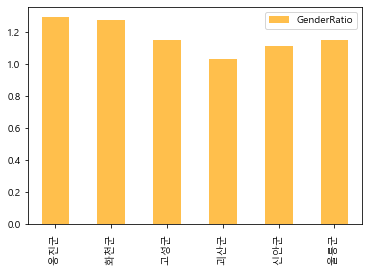

In [70]:
df6.plot.bar(color='orange', alpha=0.7)
plt.show()

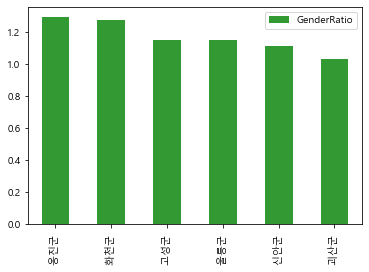

In [71]:
df7 = df6.sort_values(by='GenderRatio', ascending=False)
df7.plot.bar(color='green', alpha=0.8)
plt.show()

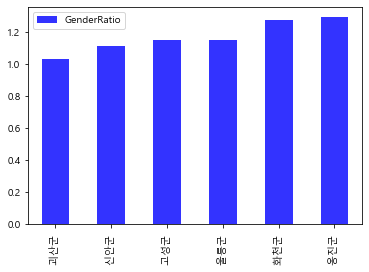

In [72]:
df7 = df6.sort_values(by='GenderRatio', ascending=True)
df7.plot.bar(color='blue', alpha=0.8)
plt.show()